<h1 style="text-align: center;"> Baseball Data Analysis </h1>

### <font color='orange'> Introduction</font>
The data that we pulled had a lot of information. The file `readME2014.txt` has information about the CSV files and basic information of all the CSV files. The following analysis was not on all the CSV files. The files that was put at the centre of all the analysis was `salary.csv` because a lot of the analysis is centered around the salary. The data cleaning operations were performed on what is present on the `salary.csv` file. On the way of exploring the Baseball data, some other csv files are also explored, i.e, 

- `Master.csv`
- `Teams.csv`
- `Batting.csv`
- `Pitching.csv`

All the CSVs are given with the project files. Downloand links of all the versions are provided in GitHub README in the form of *PDF, HTML, MarkDown, ipython Notebook and JPEG images for plots* 
<br/><br/>
<font color='red'>
 The code is strictly written in **Python 3.6** with a conda environment. It is recommended to run the code is **Python > 3.4** and using **Python2** is not at all recommended.
</font>
<br/><br/>
<font color='blue'>
**NOTE:** The actual ipynb file may not have all the details in written and the styling may not kick in as it is in PDF or MarkDown. If the intention is to skim through the analysis only instead of running the code, the PDF version is recommended.
</font>

First get all the imports down the line. I am alsi configuring my own css file to improve the look and feel of the Jupyter Notebook. The CSS file is present in styles directory in the project.

Now before we start lets first see what are the questions that we can answer about the dataset from the analysis. These question are of various type and varies from different range and different levels. **Hence after every question, the level of question is also mentioned in bold.** The questions are

- How teams invested in players in terms of player's salary? **(Basic)**
- How players recieved salary over their career? **(Basic)** 
- What are the most common salary ranges teams preferred to compensate their players? This reveals the salary standard of BaseBall. **(Intermediate)**
- Is there any abrupt changes (ups/downs) teams faced in terms of the salary they paid? This shows if any year was good or bad for Baseball players or was their any effect of recessions on players' salary. **(Intermediate)**
- Is there any abrupt chnages (ups/downs) in players' performance in any year and what could be the probable reason? **(Intermediate)**
- How batters' homeruns (HR) or a pitchers' shutouts (SHO) is affected by thier height and weight? **(Intermediate)**
- How salary affects players' performance? **(Advanced)**
- What makes a team secure first rank or at least be in top 3? **(Advanced)**


In [1]:
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from IPython.display import display
from IPython.core.display import HTML
###################################
### We are supressing all warnings with an assurance that the 
#  warnings that are supressed are are not substantial #
#########################################
import warnings
warnings.filterwarnings('ignore')
###################################
######### Our custom import #######
from core import configure
from core import _rc
###################################

Configuring our RC file is important to give plots my own customized look and feel. For more info on `rcParams` and visual parameter configuration, please click [<strong>here</strong>](http://matplotlib.org/users/customizing.html) 

In [2]:
configure(configType='css')
configure(configType='rc')

Now some basic path resolve according to the project directory. [<strong>Here</strong>](https://docs.python.org/2/library/os.path.html) is the documentation for os module for python.

In [3]:
###### Resolve the path of the data source #######
ROOT = r'../res/baseball'
# -----  team data ----- #
from core import BaseballModel
model = BaseballModel(ROOT)
salary = model.salary
master = model.master

### <font color='orange'> Let's start the Data cleaning !!</font>
The data cleaning that we are going to perform would be based on `Salary.csv`. If we open the `Salary.csv`, we see no players' name but only their IDs. Now we would need players' name in furute. The players' name is only available in `Master.csv`. Hence we need to pullin the corresponding names of the players along with their IDs. Moreover in the salary csv file, entries are noted only from `1985` to `2014`. Salary info of any other year previous to this is not present, may be because the recodings of Salary is started from `1985` and not prior to that. Hence players who used to play prior to `1985` had no entry in the Salary.csv file. Hence we need to take only those entries whose record can be found in Salary.csv.

In [4]:
####### Creating data_1 and pulling the fileds form csvs that we need only #######
required_master_cols = ['playerID', 'nameFirst', 'nameLast', 
                        'weight', 'height', 'bats', 'throws']
data_1 = salary.merge(master[required_master_cols], on='playerID', how='inner')
data_1['fullName'] = data_1['nameFirst'] + '_' + data_1['nameLast']

This plot is the basic plot to show a bargraph of how the teams spent on player's salary. This also ensures the data cleaning was performed correctly.

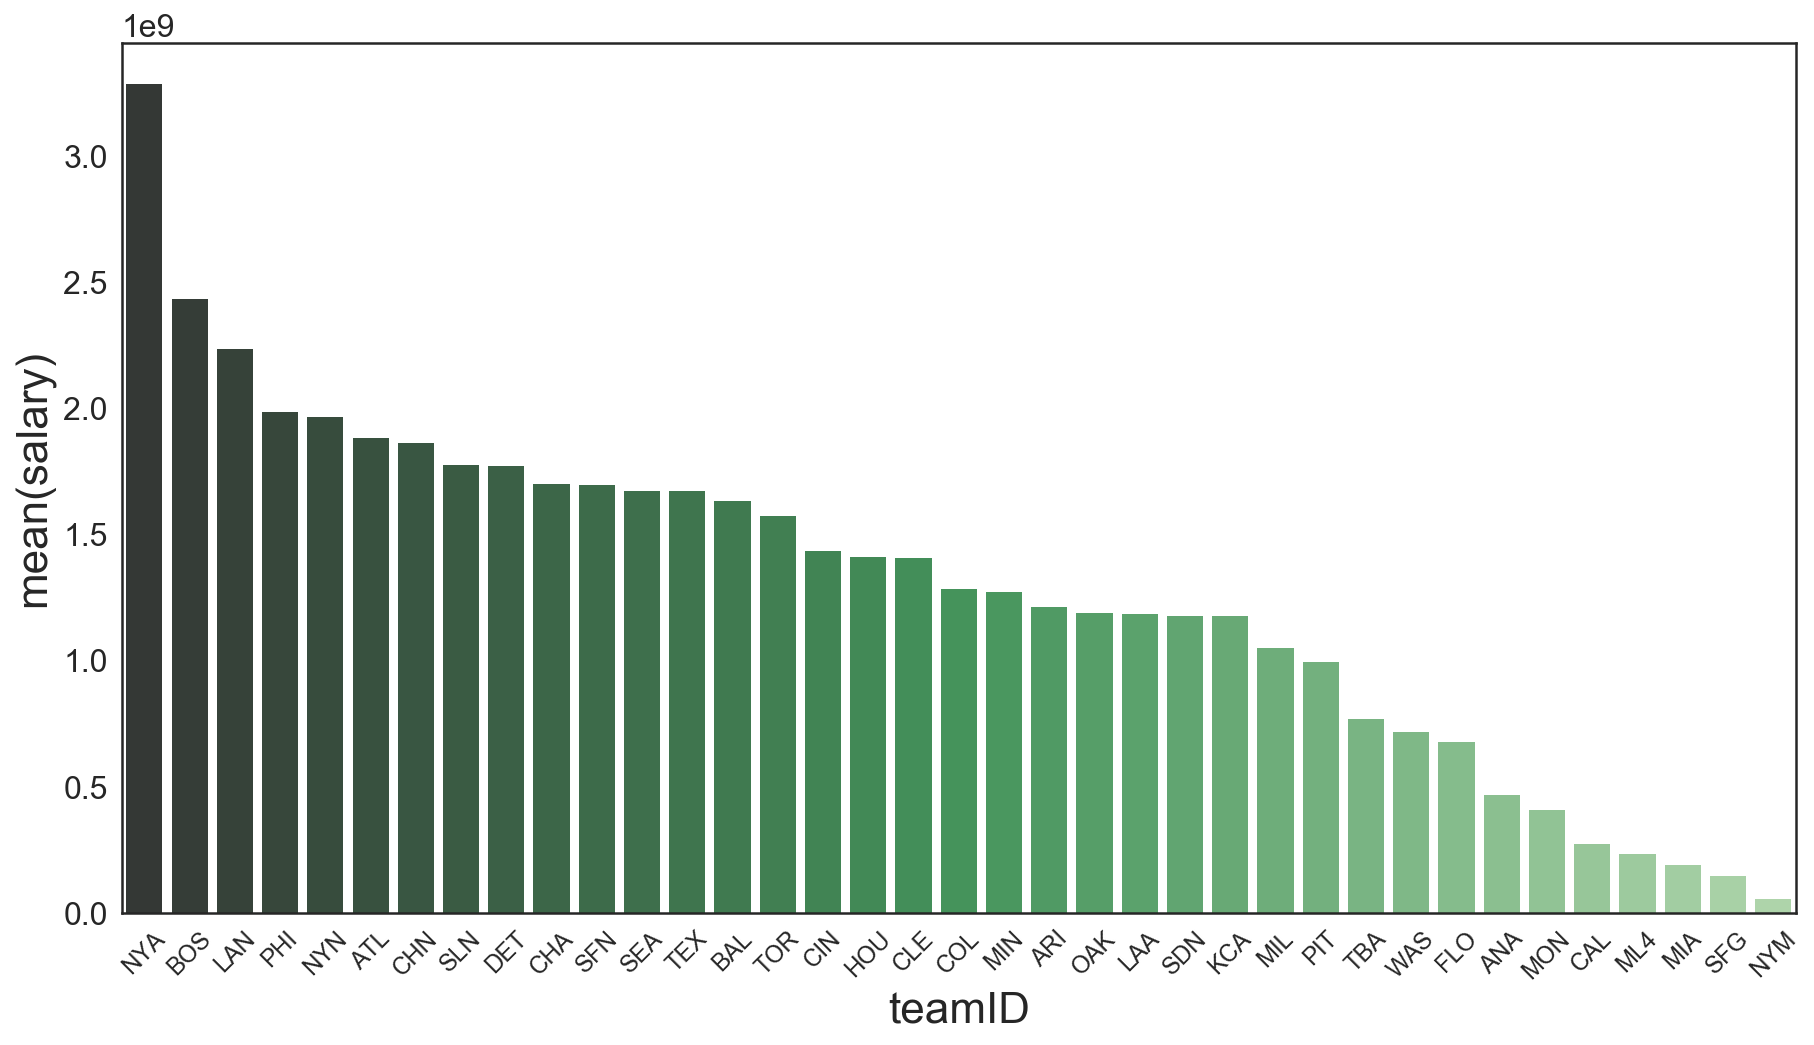

In [5]:
###### First we want to see how teams invested in their player #########

##### Clean and extract the fields we require #########
plt_data = data_1.groupby('teamID', as_index=False)['salary'].sum()
plt_data.sort_values(['salary'], ascending=False, inplace=True)
plt_data = plt_data.reset_index().drop('index', axis=1)
# display(plt_data)
########################################################
#~~~~~~~~~~~~~~~  NOW PLOT THE DATA ~~~~~~~~~~~~~~~~~~#
ax = sns.barplot(x="teamID", y="salary", data=plt_data, palette="Greens_d")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

Now we know that `SFG, LAA, NYA, BOS, LAN` are the top 5 teams in terms of spending money on their players. The next thing that we should do is to check what are top **players** in terms of salary and logically they should be from **these top teams**.

The following section shows the top 5 players in terms of total salary and the teams they played for throughout their career. This also proves the above data wrangling was performed correctly. <font color="red"> Note that `their_clubs` is not an `OrderedDict` and hence the 5 players mentioned are among to 5 but may not be in any ascending or descending order. To check top 5 players in descending order, please visit the following barchart of top 20 players.</font>

In [6]:
plot_data = data_1.groupby(['fullName'], as_index=False)['salary'].sum()
plot_data.sort_values(['salary'], inplace=True, ascending=False)
five_most_expensive_players = plot_data.fullName.head(n=5)

###########  this part is important for later use   ##########
# It stores the top 10 players and their teams they played #

g=data_1[data_1.fullName.isin(five_most_expensive_players)].groupby(['fullName'
                                                                    ,'teamID'])
tc = [k for k, gr in g]
from collections import defaultdict
their_clubs = defaultdict(list)
for player, team in tc:
    their_clubs[player].append(team)
their_clubs
##############################################################

defaultdict(list,
            {'Alex_Rodriguez': ['NYA', 'SEA', 'TEX'],
             'Barry_Bonds': ['PIT', 'SFN'],
             'Carlos_Beltran': ['KCA', 'NYA', 'NYN', 'SLN'],
             'Derek_Jeter': ['NYA'],
             'Manny_Ramirez': ['BOS', 'CLE', 'LAN', 'TBA']})

and here is the chart of top 20 players in terms of their career earnings.

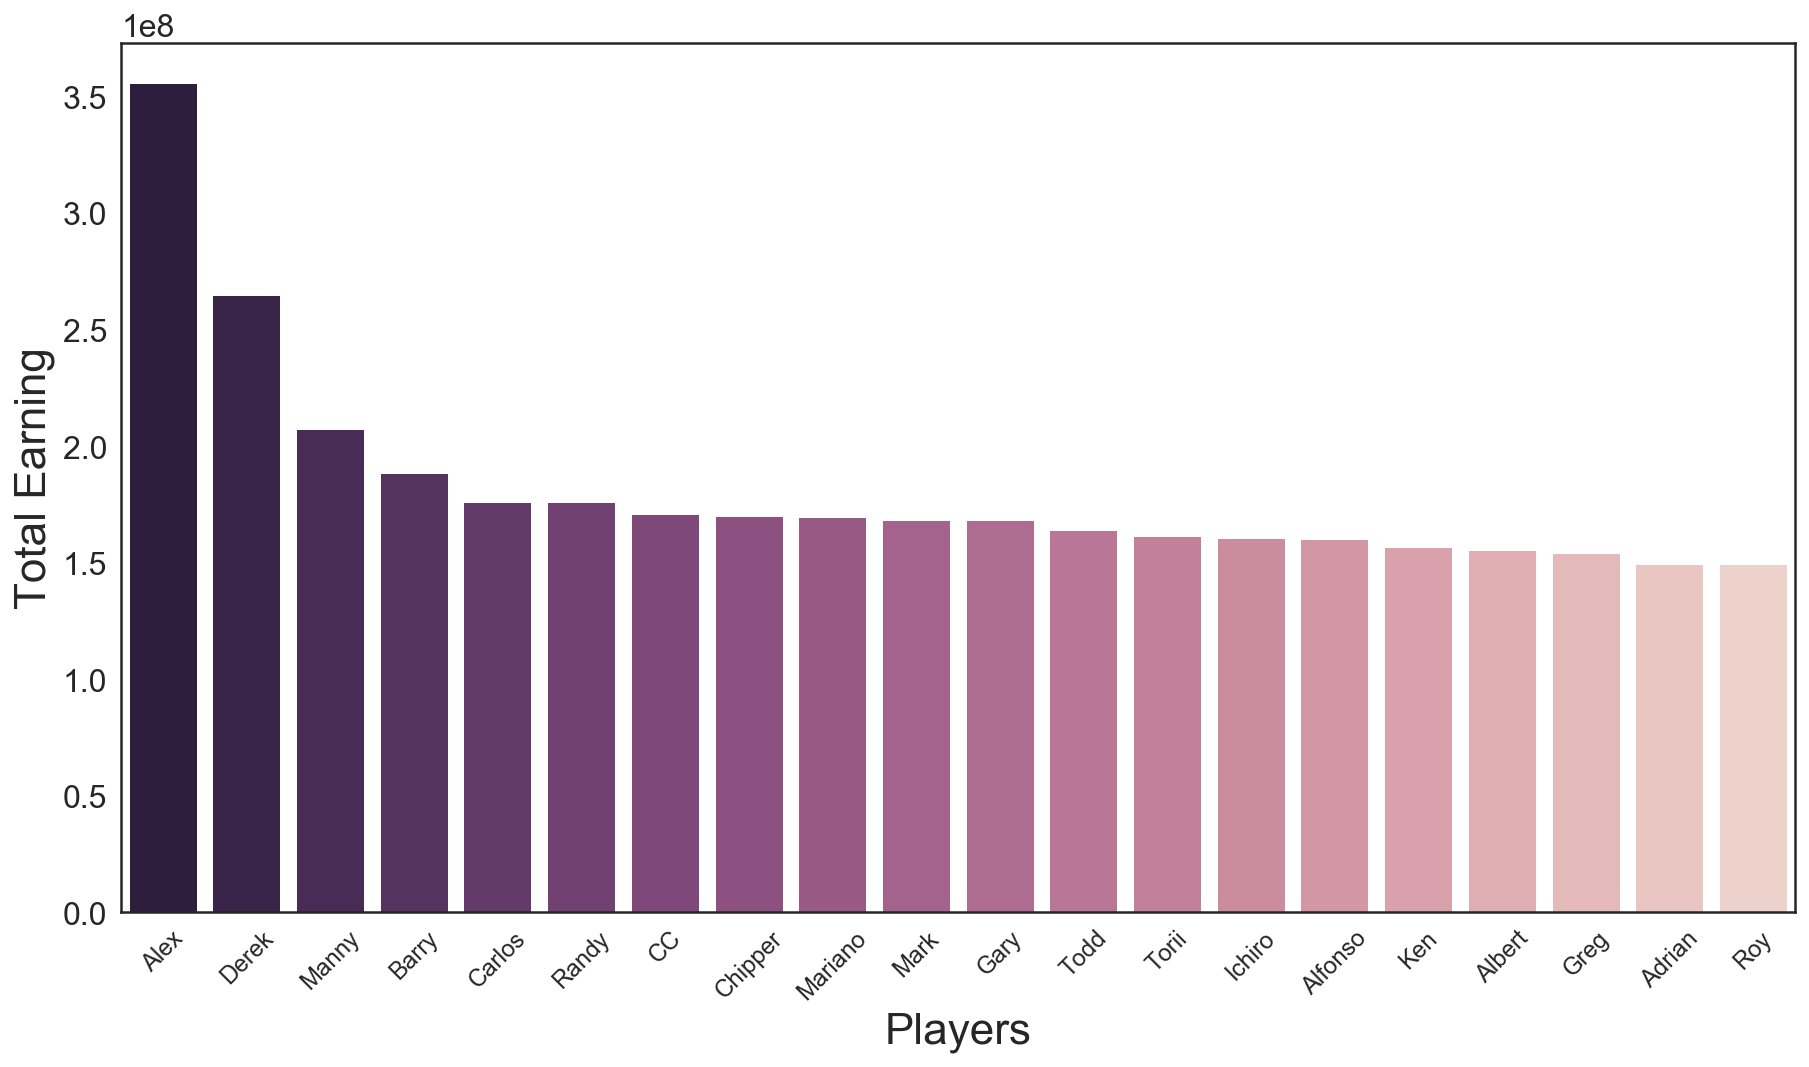

In [7]:
# getting only the top 20 players
ten_most_expensive_players = plot_data.fullName.head(n=20)
plot_data = plot_data[plot_data.fullName.isin(ten_most_expensive_players)]
# fixing the structure for seaborn plot
plot_data = plot_data.reset_index().drop('index', axis=1) 
# Plotting the top 10 players #
ax = sns.barplot(x="fullName", y="salary", data=plot_data,
                 palette=sns.cubehelix_palette(20, reverse=True),
                 saturation=1)
# printing only the firstName
ax.set(xticklabels=[*map(lambda e: e.split('_')[0], 
                         plot_data.fullName)])
ax.set(xlabel='Players', ylabel='Total Earning')
plt.xticks(rotation=45) 
plt.show()
##############################

We would revisit this later on.
Now before we move ahead, let's visualize the distruibution desdity of player's salary. From this we can visualize that **what is the most common salary ranges teams prefer to compensate their players**.

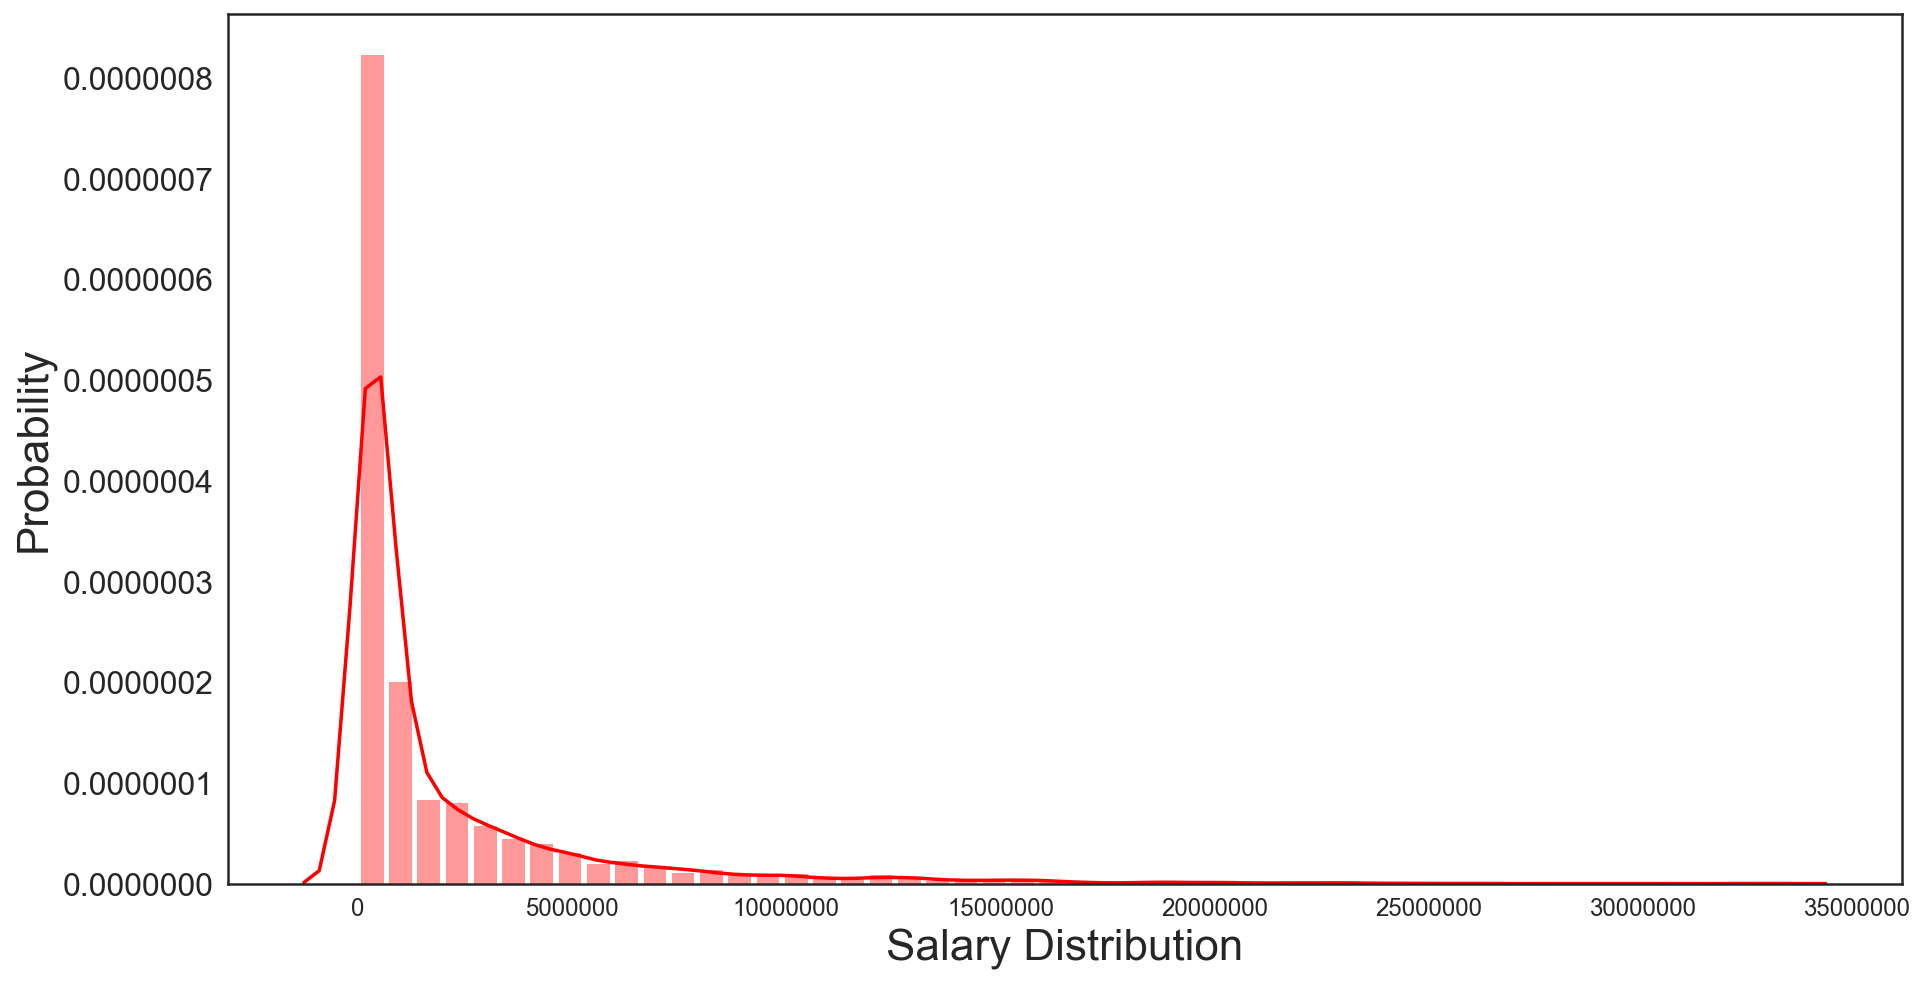

In [8]:
from scipy import stats, integrate
ax = sns.distplot(data_1.salary, bins=50, kde=True,
                  rug=False, color='r', hist_kws={'rwidth': 0.8});
# sns.kdeplot(data_1.salary, shade=True);
# ax.get_xaxis().get_major_formatter().set_useOffset(True)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
ax.set(xlabel='Salary Distribution', ylabel='Probability')
# TODO  Manually format the xticklabels and yticklabels values
plt.show()

### <font color='orange'> Were they all thrifty ??</font>

The above distribution is skewed and it is the distribution of salary. This shows the most density distribution is located around `0 to 5000000`. This proves that high salaries were not so frequent. What does this shows?? This shows a common human nature; **most people are thrifty when it comes it money, atleast the baseball teams were.**

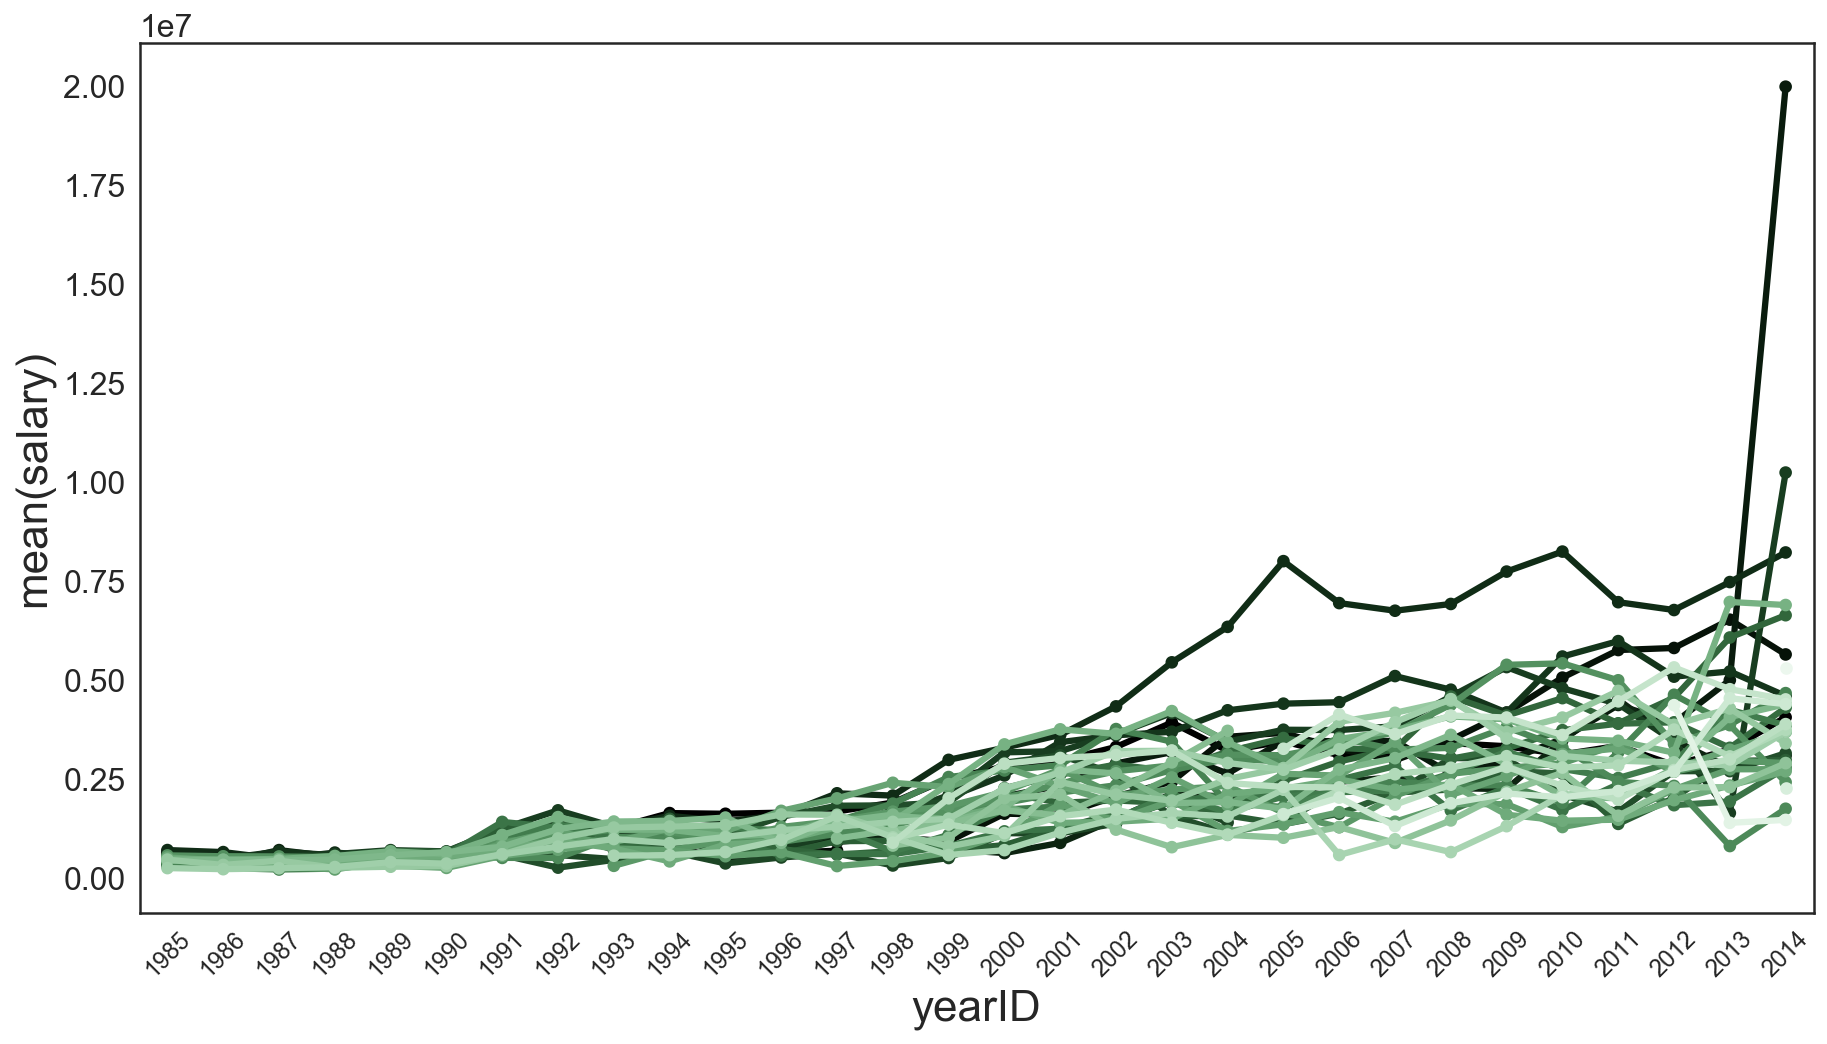

In [9]:
rot = sns.cubehelix_palette(len(data_1.teamID.unique()), start=2, 
                            rot=0, dark=0, light=.95, reverse=True)
ax = sns.pointplot(x="yearID", y="salary", data=data_1, 
                   hue='teamID', palette=rot, ci=None, 
                   markers='.', join=True)
ax.legend_.remove()
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

### <font color='orange'> Did teams think similar when it comes to money ??</font>

The above timeseries shows how people liked to invest over the passage of time. Each teams represent a single line. The idea is not to show how each teams are investing over time, rather it shows what is the investment pattern of all the teams. We can see that upto _2001_ all the teams invested almost similarly. Beyond `2001` to around `2010` the diffence between the investment of teams increased substantially with some team investing a lot than others. But beyong `2011` this difference got really big and we can also see the top 3 highest investments were made in the year of `2014`. For example, we can see the the one team at `2005` invested a lot more than others and kept on investing till the end. The following code shows this club name an the money that they invested. 

```python
data_1[data_1.yearID == 2005].groupby('teamID', 
        as_index=False)['salary'].sum() \
        .sort_values('salary', ascending=False) \
        .reset_index().drop('index', axis=1).ix[0]
```

This prints
```
teamID          NYA
salary    208306817
Name: 0, dtype: object
```

This is logical too because we have already seen that `NYA` invested most out of all the teams.

Interestingly, in the year of `2014`, `NYA` didn't remain at number 1 position and it changed to `LAN`. This code shows it below
```python
data_1[data_1.yearID == 2014].groupby('teamID', 
        as_index=False)['salary'].sum() \
        .sort_values('salary', ascending=False) \
        .reset_index().drop('index', axis=1).ix[0:2]
```
this prints,

```python
	teamID	salary
0	LAN	214014600
1	NYA	197543907
2	PHI	180944967
```

** Howerver the trend that we have seen, we can say unless the team is an extraordinary, most teams spent likely over the passage of time**

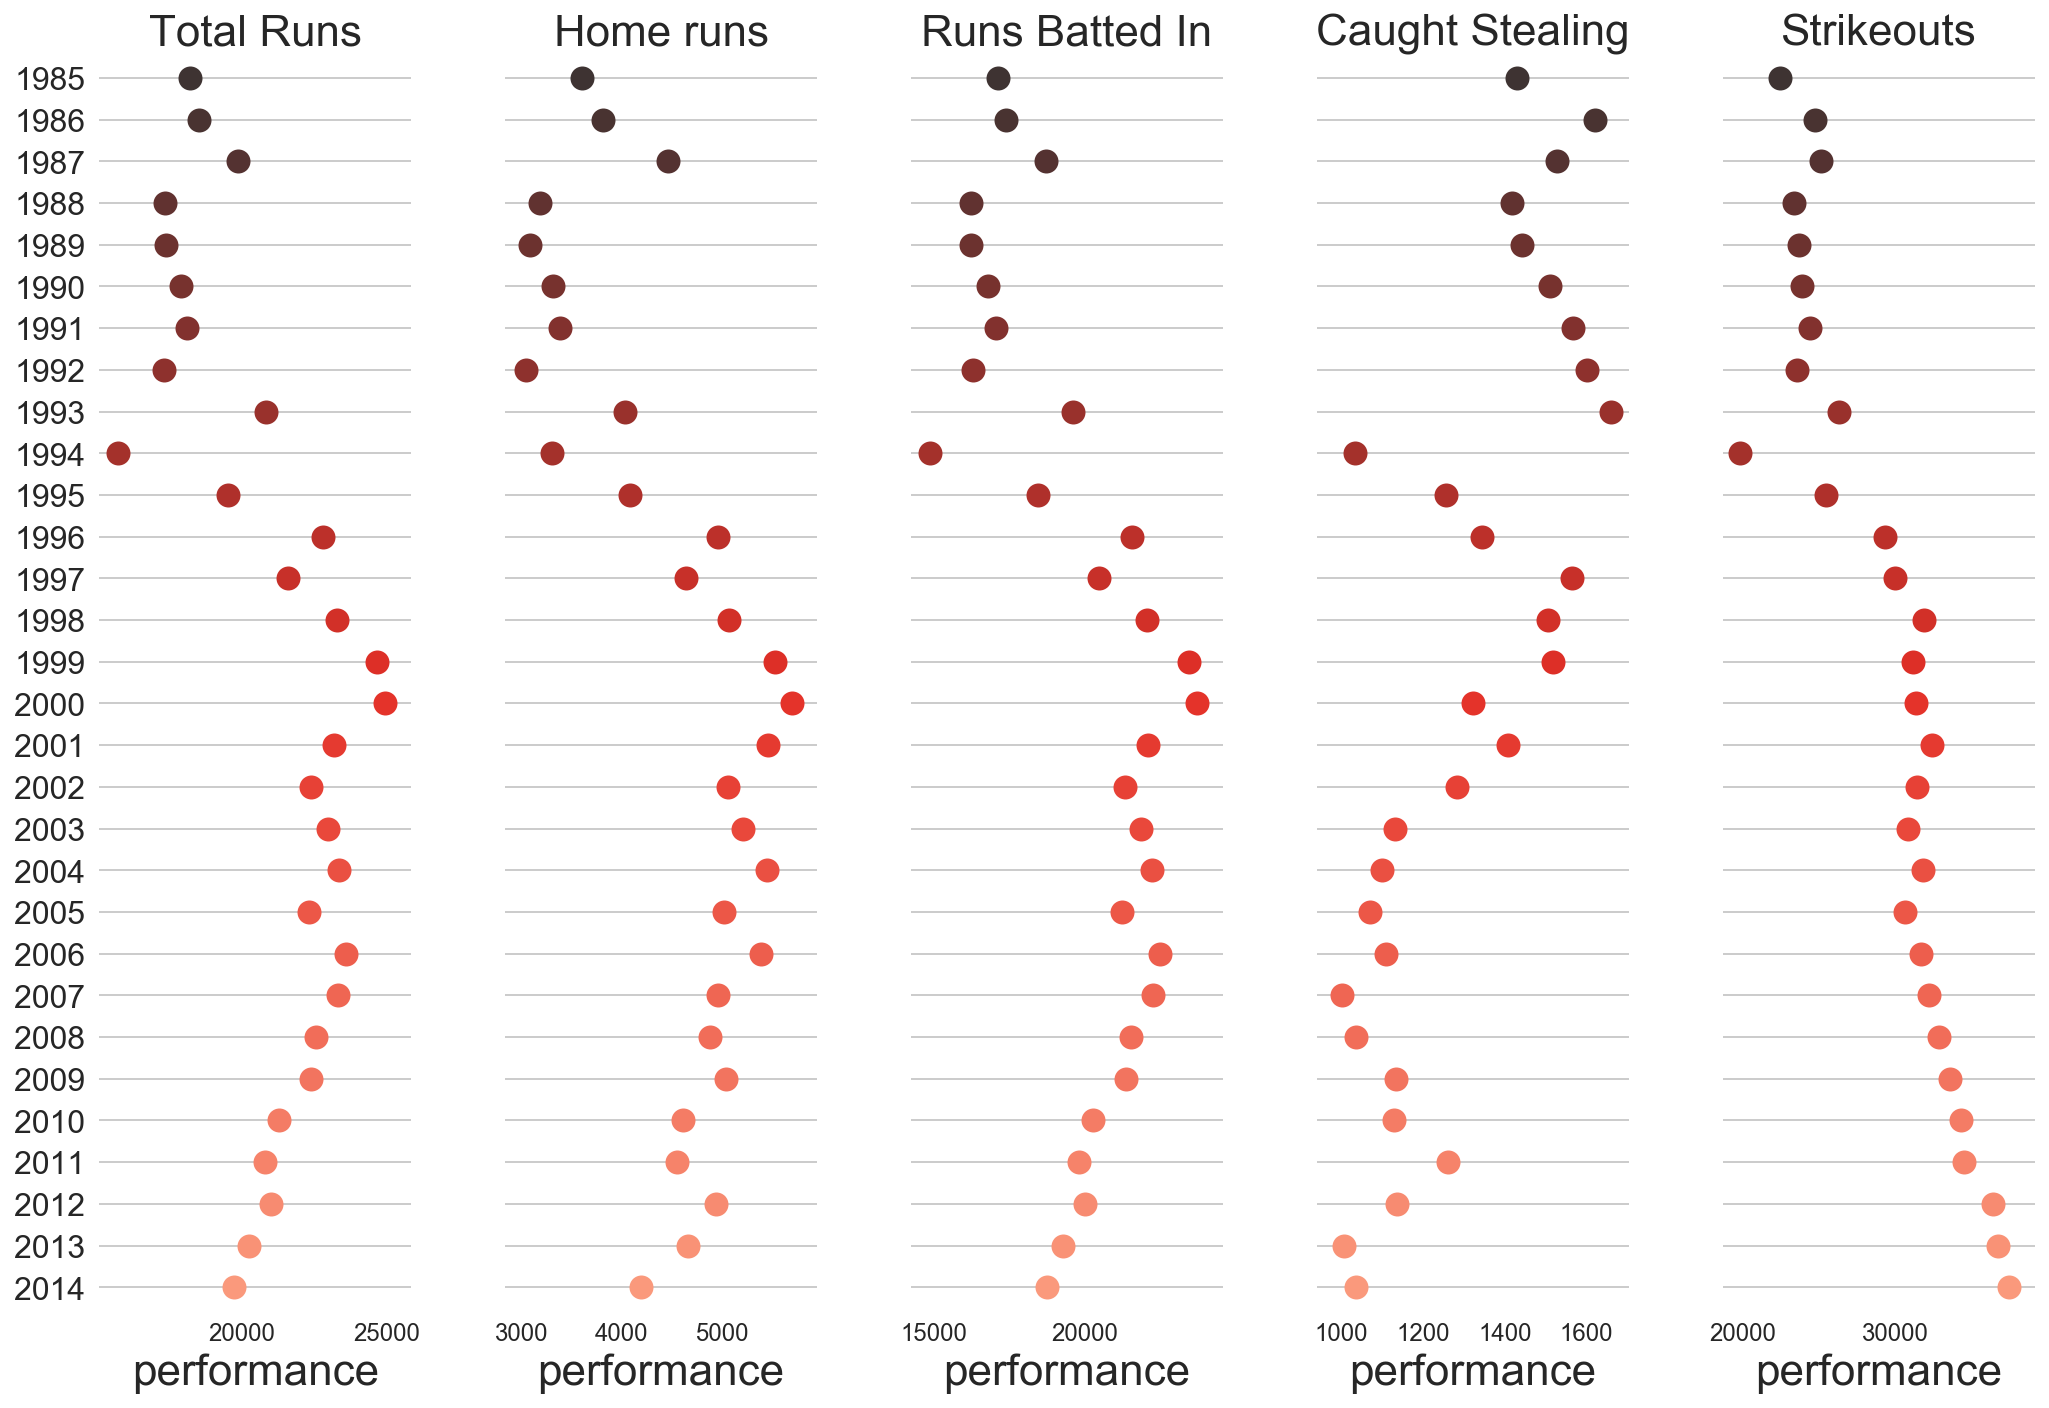

In [10]:
batting = model.batting
BaseballModel.performance_burndown(batting)

Now in the above plot I have tried to show how different metric changed over time form 1985 to 2014. We can see for example that there is an abrupt decrese in the total runs scored in the year of 1994 as compared to other years. **Let's verify if the plot shows the right value?** If we execute `plot_data.R.argmin()` it returns `9` which is the row number of the `plot_data` table which is further derived from `batting`. So to get the year we execute `plot_data.ix[9][['yearID', 'R']]` and indeed the year is 1994 and the run is 15752 which can also be verified from the scale. Evidently all other performance of Batters and Pitchers in the year of 1994 was poor as compared to other years. ** SO I GUESS 1994 WAS A DARK YEAR FOR BASEBALL FANS..:)**

### <font color='orange'> Time for another data cleaning</font>

Now as we have colleced some data into the DataFrame called `data_1`, we need to match it with our new DataFrame: `batting`. In other words we need to keep only those entries from `batting` Dataframe whose entry is found in the `data_1` DataFrame. The resaon we want to do this because we don't want to keep any entries of any players who salary, name, surname, height, weight, pitching hand and batting hand is not present. The common way to achieve this is to <font color='red'>merge(..)</font> on both the DataFrames `on=playerID`

In [11]:
required_batting_cols = ['playerID', 'G', 'R', 'HR', 'CS', 'SO', 
                         'yearID', 'teamID']
data_1 = data_1.merge(batting[required_batting_cols], 
                 on=['playerID', 'yearID', 'teamID'], 
                 how='left').fillna(0)
# display(data_1)


Now I would go into much more interesting and fun stuffs we I would bring in some statistics and hypothesis tests into this but for now, let's focus on the the data table that we have already. Here all the batters staticstics form 1985 to 2014 is avaialbale with their salary and other game related performances.

Let's merge the **pitching** table too as we have done with the **batting** table. The data cleaning process would be exactly similar except the coulumns that needs to be merged

In [12]:
# pitching = pd.read_csv(os.path.join(ROOT, 'Pitching.csv'))
# pitching = pitching[pitching.yearID >= 1985]
pitching = model.pitching
required_pitching_cols = ['yearID', 'teamID', 'playerID',
                          'G','SHO', 'SV', 'HR', 'R']
data_1 = pd.merge(data_1, pitching[required_pitching_cols], 
            on=['playerID', 'yearID', 'teamID', 'G'],
            how='left').fillna(0)
data_1.rename(columns={"R_x": "Runs_Scored", 
                  "R_y": "Runs_Allowed",
                  "HR_x": "HR_Scored",
                  "HR_y": "HR_Allowed"}, inplace=True)

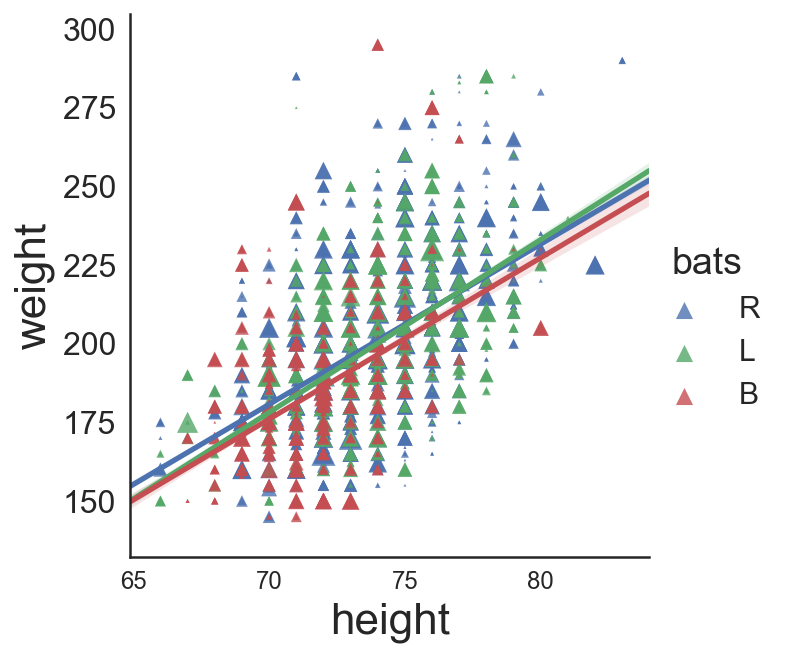

In [13]:
# sns.set_style('ticks')
sns.lmplot(data=data_1, x="height", y="weight", hue="bats",
          scatter_kws=dict(s=data_1.HR_Scored * 2), markers=['^', '^', '^'])
plt.show()

### <font color='orange'>What are the facts the above plot shows ?? </font>

- More players play with their **LEFT** hand as compared to the **RIGHT** hand because there is a lot green as compared to red and blue
- Players with most homeruns are of **medium height and medium weight** category. Tall or heavy weight players performed not so well.

**Let's see if trend is same in case of of Pitchers!!**

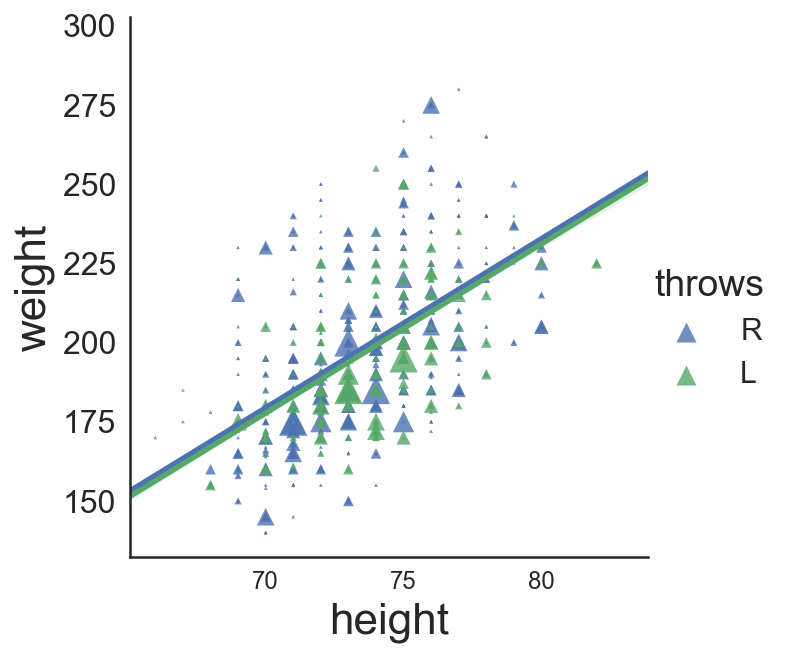

In [14]:
sns.lmplot(data=data_1, x="height", y="weight",hue="throws",
          scatter_kws=dict(s=((data_1.SHO)**2) * np.pi), markers=['^', '^'])
plt.show()

### <font color='orange'> Wow we see some wonderful trends here too </font>
- Number of players with shutouts is far less than the number of players with homeruns. This means players like to bat more than pitch.
- There are not pitchers who like to throw with both of their hand as comared to the batters. Which means piching can either be done by **left hand** or **right hand** but not with both the hand.
- The **weight** and the **height** trend is similar to the batting. Most of the players performed well if they are medium weight and medium height. We can verify that the bigger marker sizes are all in the middle.
- One more interesting thing is that even some of the outliers are also above _280_ in weight category whcich is I guess natural because if you are heavy weight, you can not run well and hence as a pitcher, you perform poorly

### <font color='orange'> Let's move into some Statistics now!! </font>

First let's `group` all the enries in the `DataFrame` by the player's ID. Then sum all player's **Total Runs Scored** and their **Total Salary**

In [15]:
data_1.groupby('playerID', as_index=False)['playerID', 'Runs_Scored', 'salary'].sum().head()

,playerID,Runs_Scored,salary
0,aardsda01,0.000,9259750
1,aasedo01,0.000,2300000
2,abadan01,0.000,327000
3,abadfe01,0.000,1428900
4,abbotje01,74.000,985000


Interestingly some players have scored 0 runs but they were paid a lot. **How is it possible?** It's not necessary that these players are bad as these players can be pitchers and they might have some good **Saves** against some batters. So the logical solution is to combine the `SV` column with this group by table. But the problem is that they don't share the same scale hence to combine, we need to `standardise` these two columns and then both the values and create a new column say `performance`.



In [16]:
stat_data = data_1.groupby('playerID', 
                           as_index=False)['playerID', 
                                          'Runs_Scored', 
                                           'salary', 
                                           'SV'].sum()
stat_data['performance'] =  (stat_data.SV / stat_data.SV.std(ddof=0)) + \
                            (stat_data.Runs_Scored / stat_data.Runs_Scored.std(ddof=0))

In [17]:
display(stat_data.head())

,playerID,Runs_Scored,salary,SV,performance
0,aardsda01,0.000,9259750,69.000,2.097
1,aasedo01,0.000,2300000,38.000,1.155
2,abadan01,0.000,327000,0.000,0.000
3,abadfe01,0.000,1428900,0.000,0.000
4,abbotje01,74.000,985000,0.000,0.304


Now I guess I may not need the `Runs_Scored` and the `SV` columns. So we can drop them.

In [18]:
stat_data.drop(['Runs_Scored', 'SV'], axis=1, inplace=True)

Now it's time to prepare our data. We are going to perform an Hypothesis test to figure out ** If above average salary resulted in above average performance??** However we are taking `median` here instead of `mean` to reject all the outliers.

In [19]:
stat_data_below_average = stat_data[stat_data.salary < stat_data.salary.median()]
stat_data_above_average = stat_data[stat_data.salary >= stat_data.salary.median()]
# display(stat_data_above_average)

Now before we move ahead, let's perofrom a quick plot see the total number of people in both the groups

In [20]:
performanceMean = stat_data.performance.mean()
def label_performance(row):
    if row['performance'] < performanceMean:
        return 'Low Performer'
    else:
        return 'High Performer'
stat_data['Performing_Level'] = stat_data.apply(lambda row: label_performance(row), axis=1)

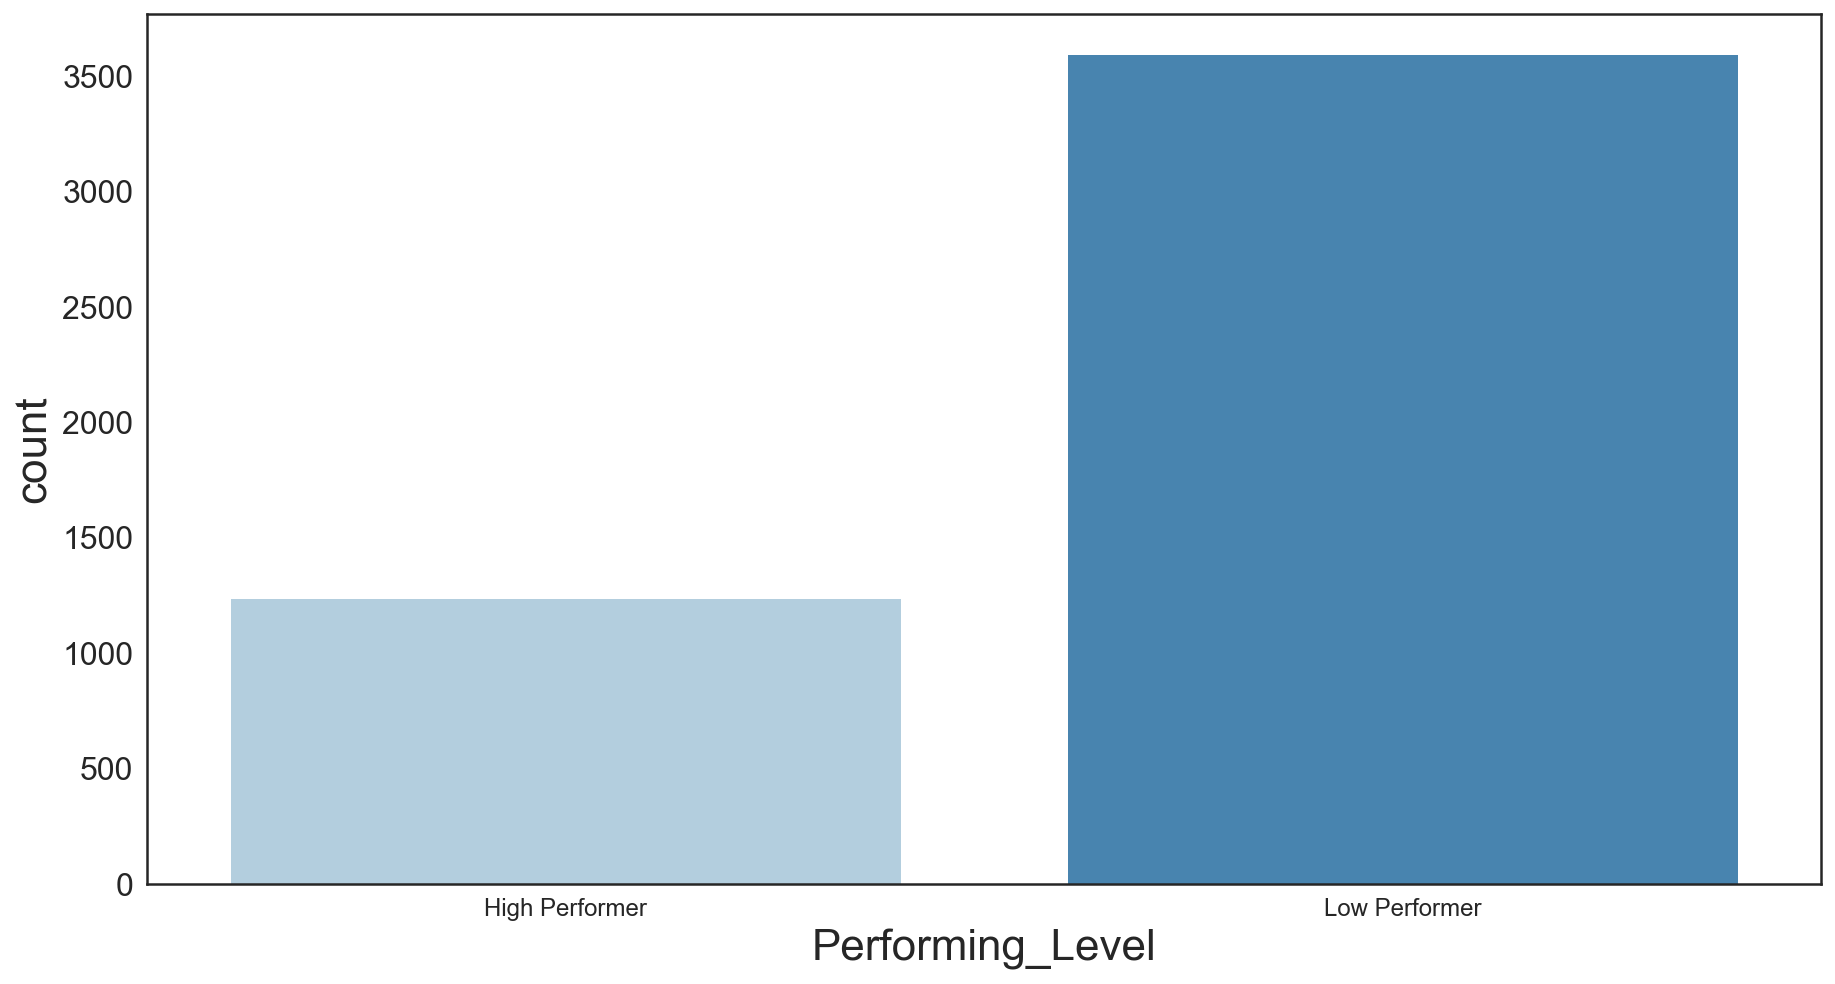

In [21]:
ax = sns.countplot(x="Performing_Level", data=stat_data, palette="Blues")
plt.show()

As we expected, there are a lot less high performers as compared low performers.

<div class="latex">

$$ \blacktriangleright \text{    H}_o = \text{Player's performance would not be different or, } \mu_h = \mu_l $$
$$ \blacktriangleright \text{      H}_a = \text{Player with better salary would have higher performance } \mu_h > \mu_l $$

</div>



In [22]:
#####  Getting the two sample series #######
sample_low = np.array(stat_data_below_average.performance)
sample_high = np.array(stat_data_above_average.performance)

###### Degrees of Freedom #######
df = len(sample_low) + len(sample_high) - 2
# print(df)

###### α Value ######
alpha = 0.5


####### Mean of Samples ##########
x_low = sample_low.mean()
x_high = sample_high.mean()

#######  t-statistics at α=0.5 ######
#### For degrees of freedom of 4819 and one tailed t-test #####
t_alpha = 1.64516992

####### Standard Deviations #########
S_low = sample_low.std(ddof=1)
S_high = sample_high.std(ddof=1)


######## Sample Sizes ########
n_low = len(sample_low)
n_high = len(sample_high)

####### Standard Error ########
s1 = (S_low**2) / n_low
s2 = (S_high*2) / n_high
s = s1 + s2
SE = np.sqrt(s)  # <------ Standard Error

###### t-statistics for the sample ######
t_stat = (x_high - x_low) / SE

HTML("t-Satistics is <strong>{}</strong> while the \
     t-critical at α=0.5 is <strong>{}</strong>".format(t_stat, t_alpha))


### <font color='orange'> Decision on the Hypothesis </font>


So as we can see that the _t-stat_ is huge as compared to the _t-critical_ and the _t-stat_ is positive. This means we reject the null hypothesis in favour of alternative hypothesis. Now we can surely say that **The players who were paid more performed better**
Below is a plot which displays it more clearly

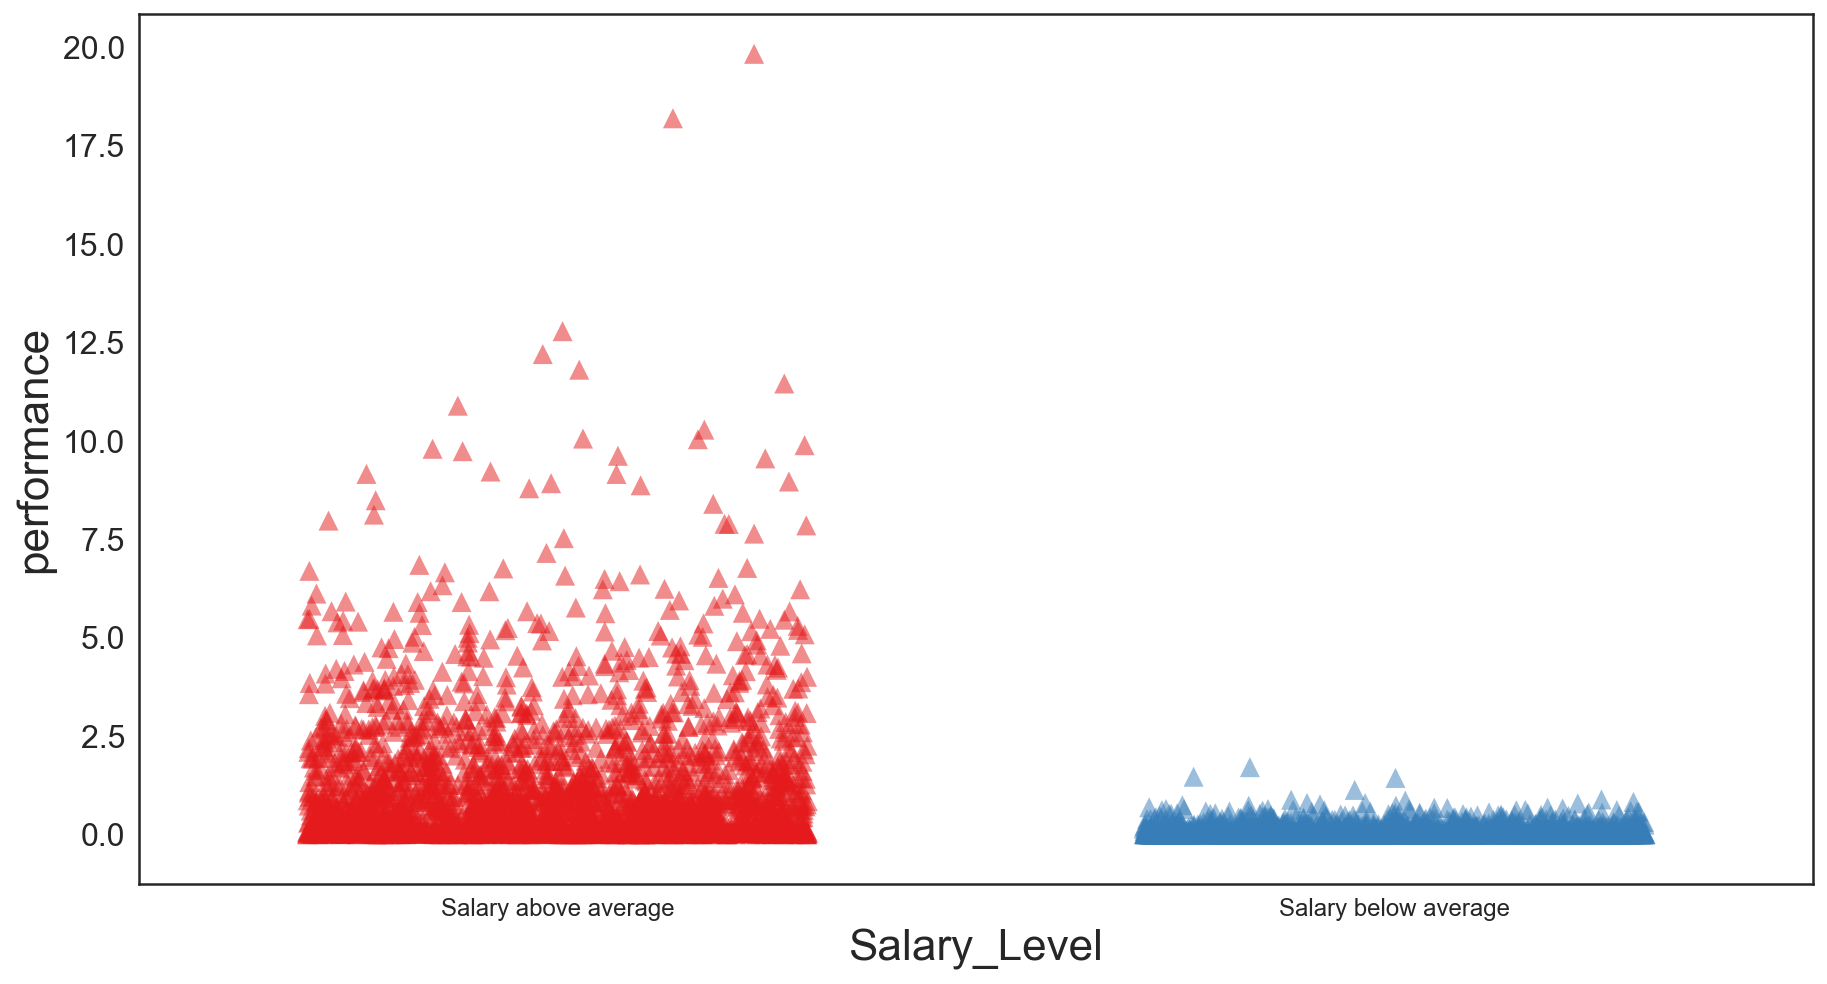

In [23]:
salaryMedian = stat_data.salary.median()
def label_salary(row):
    if row['salary'] < salaryMedian:
        return 'Salary below average'
    else:
        return 'Salary above average'
stat_data['Salary_Level'] = stat_data.apply(lambda row: label_salary(row), axis=1)
ax = sns.stripplot(x="Salary_Level", y="performance", data=stat_data, 
                   jitter=0.3, palette="Set1", 
                  edgecolor="gray", 
                  size=10, alpha=0.5, 
                  marker="^")
plt.show()

In the above plot we can see that the category `Salary below Average` is only concentrated within the performance range 0 to 2.5 with an exception of few points as true otliers. While in the right for the category `Salary above average` is distributed upto 7.5 and having some outliers upto 20.

Another plot below is more descriptive about two categories above relating to the wide range of performance keys distributed within the sample data. 

In [24]:
plot_data = data_1.groupby('playerID', 
                           as_index=False)['playerID', 
                                           'Runs_Scored',
                                           'G',
                                           'HR_Scored',
                                           'CS',
                                           'SHO',
                                           'SV',
                                           'salary'].sum()
plot_data['Salary_Level'] = stat_data.apply(lambda row: label_salary(row), axis=1)

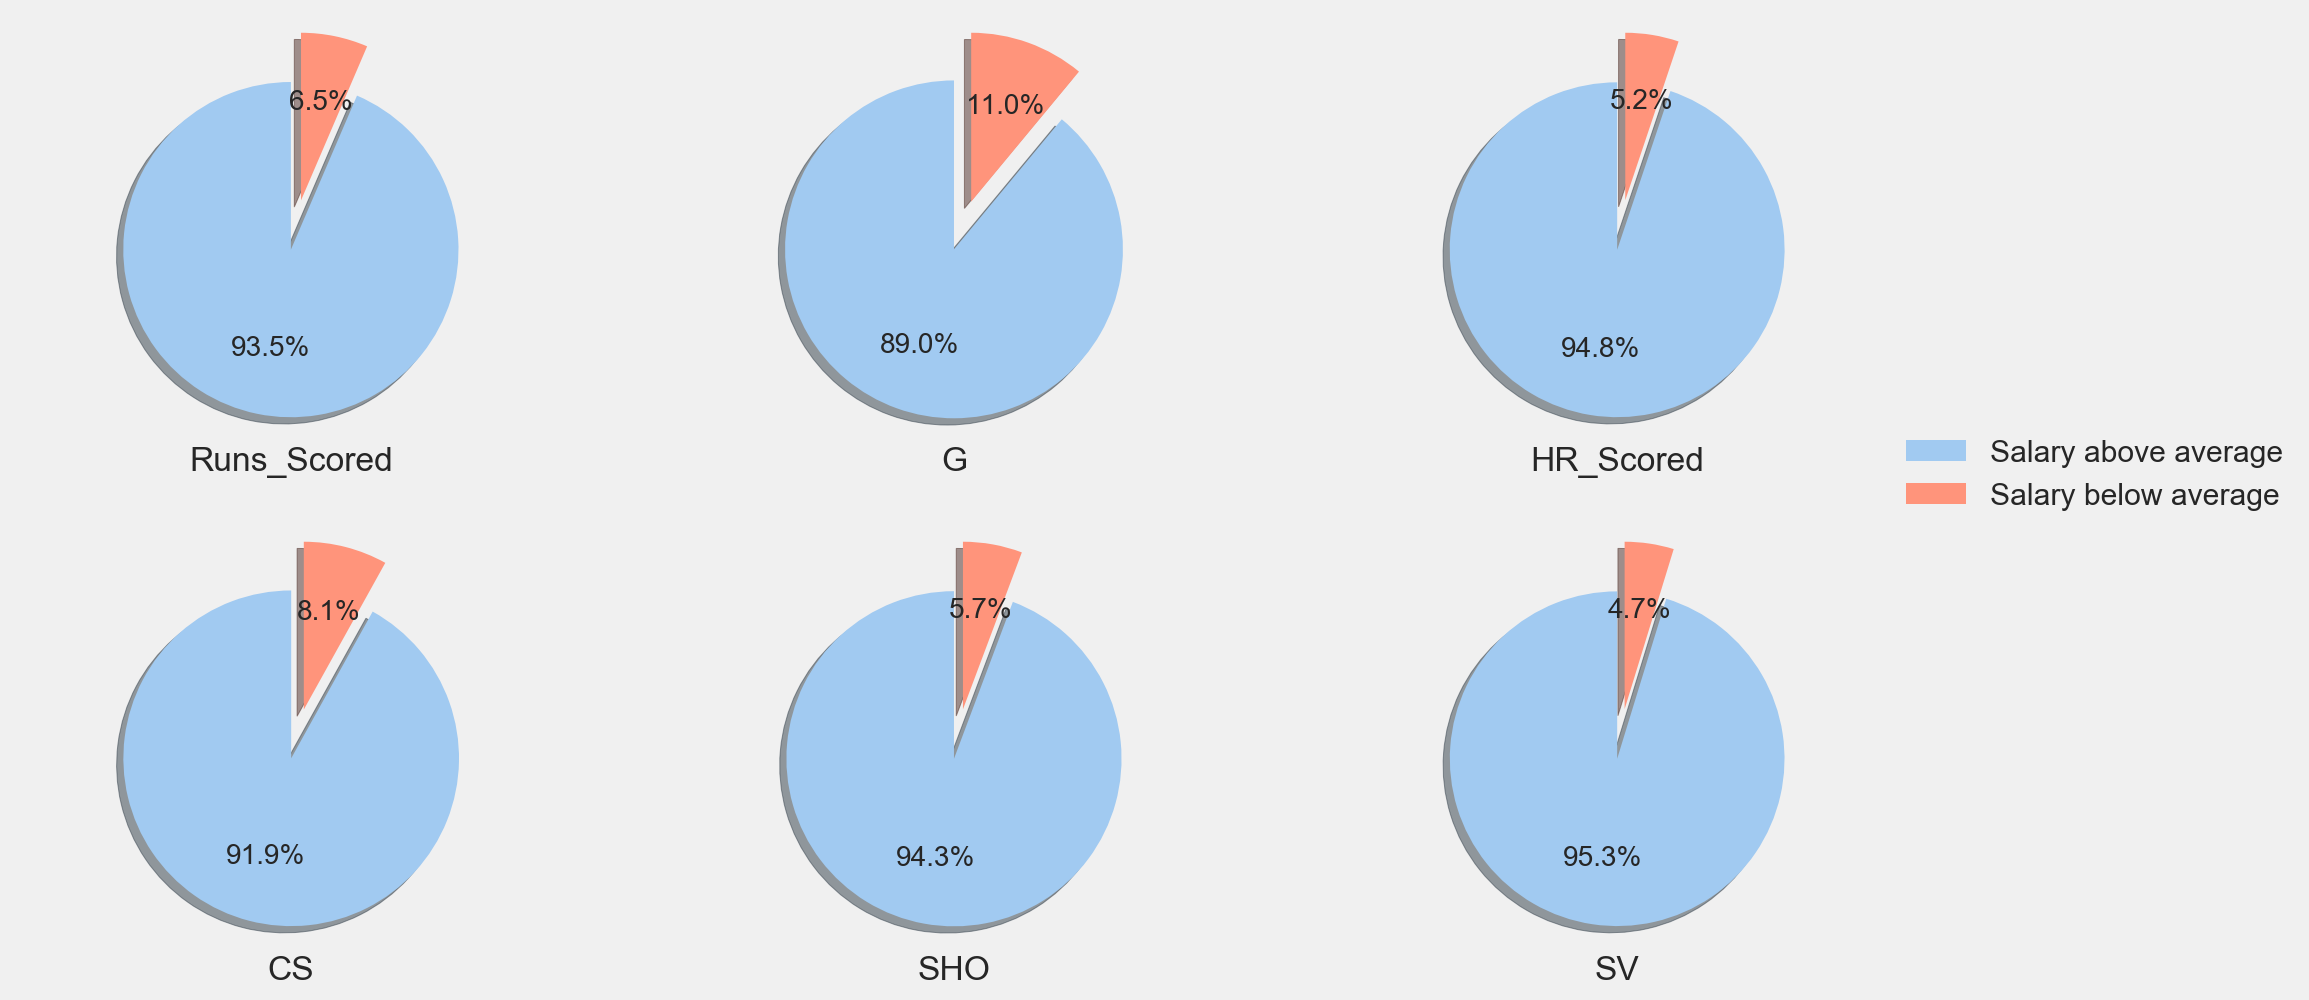

In [25]:
BaseballModel.create_descriptive_pie(plot_data, hue='Salary_Level', 
                                  columns=['Runs_Scored',
                                           'G',
                                           'HR_Scored',
                                           'CS',
                                           'SHO',
                                           'SV'])


We can see that in all of the cases **players above average salary** did well in all those performance metrics as compared to **players below average salary**. This proves even more that players with better salary played better too. This proves very well that in almost all the metrics players performed well when they were payed more.

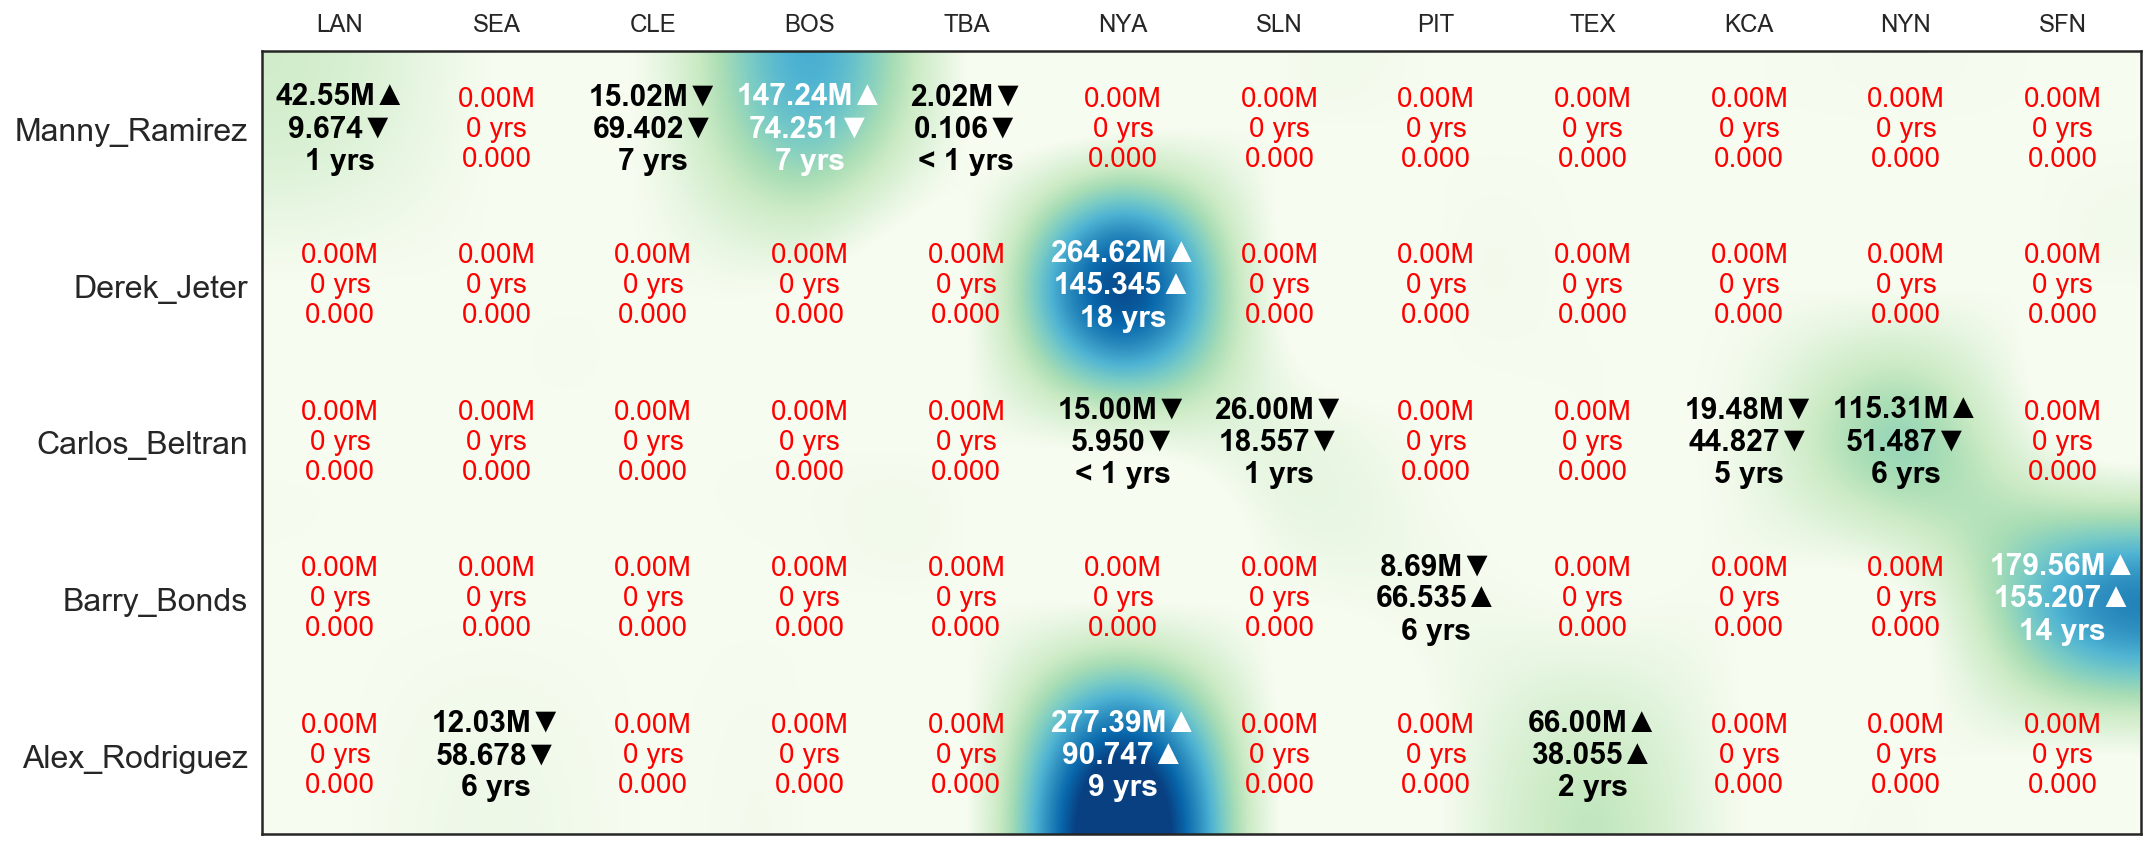

In [26]:
configure(configType='rc')
heatmap_meta = model.prepare_heatmap_data(data_1, their_clubs, tc)
BaseballModel.create_categorical_heatmap(heatmap_meta)

### <font color='orange'> Phew!! I have worked really hard for this.. </font>

The above is not just a heatmap but it combines so many things togather. But before that lets first see what are the questions we are trying to answer with this.

 - Can we say that most expensive players in total are quick team switchers?
 - Are most expensive players are best peformers too?
 - When player played for a less amount of time, are their performace and salary is that good as compared to when they played for long?
 
 The above heatmap is shows the way top 5 players ( in terms of total Salary ) switched their teams over their career. It also shows `3 numbers` for each cells. 
 
The **first Number** shows how much money that players has earned while playing for that team.

The **second Number** shows a performace metric of that player when he played in that team.

The **third Number** shows How long the player played for that team.

With all these we can see that **some arrow** (up or down) after the first two numbers. These arrows shows trends. For example an up arrow after the salary means that _**THE PLAYER'S SALARY WHILE HE WAS PLAYING FOR THAT TEAM IS WITHIN THE TOP 5 FOR THE AMOUNT FOR YEARS HE PLAYED FOR THAT TEAM**_. The same is for performance metric. Consequently, the down arrow means it is not in top 5.

The performance metric itself is curated very carefully giving preference to almost all the factors that makes baseball player a baseball player. The metrics that are used is 
```python
# G           = Number of total games played    ( For all )
# Runs_Scored = Total number of runs scored     ( For batters  )
# HR_Scored   = Total number of homeruns scored ( For batters  )
# SHO         = Total number of shutouts        ( For Pitchers )
# SV          = Total number of saves           ( For Pitchers )
metrics = ['G', 'Runs_Scored', 'HR_Scored', 'SHO', 'SV']
```
As these metrics lie in different range from each other and combining these direcly would not work. Hence the metrics were standardized like this

```python
gTemp = temp.groupby('fullName', as_index=False)[metrics].sum()
gTemp['G'] /= temp.G.std()
gTemp['Runs_Scored'] /= temp.Runs_Scored.std()
gTemp['HR_Scored'] /= temp.HR_Scored.std()
gTemp['SHO'] /= temp.SHO.std()
gTemp['SV'] /= temp.SV.std()
gTemp['Gross_Metric_Score'] = gTemp['G'] + \
     gTemp['Runs_Scored'] + gTemp['HR_Scored'] + \
     gTemp['SHO'] + gTemp['SV']
```

Because the gross metric is taken, it it pretty balanced out for only batters, only pitchers or both batter and pitchers.

In the above heatmap we can see that most of the players switched their teams atleast once. Some even switched to even 4 teams. Some players played for a team for less than one year which is pretty stange. We can that `Derek Jeter` is a player who played for only one club and never switched in his long `18 years` of career. Also for both his salary and performance we see an up arrow. This means he was happy while playing for `NYA` and paid very well for his long career.

`Barry Bonds` was a remarkable player though. While he was playing for `PIT` for 6 long years, even his salary was not within the top 5, but his performance was always in top 5 range. Probably that's why he switched the team to `SFN` where he played for 14 long years. This can be verified further by running the following command 
```python
for k, g in data_1[data_1.fullName == 'Barry_Bonds'].groupby('teamID'):

    display(g)
```
We can see that `Barry Bonds` played in `PIT` from `1986 to 1992` and then he switched to `SFN` where he played from `1993 to 2007`

But interestingly more money playes got, more teams they changed. The code below proves that

```python
number_of_switches_by_low = []

number_of_switches_by_high = []

for k, g in data_1.groupby('fullName'):

    if g.salary.mean() <= data_1.salary.mean():
    
        number_of_switches_by_low.append(len(g.teamID))
    else:
    
        number_of_switches_by_high.append(len(g.teamID))
print(np.mean(number_of_switches_by_low))
print(np.mean(number_of_switches_by_high))
```

This prints 
```
4.1706527155
10.8418918919
```
This means players who got more salary than the average, switched more than two times than those who got less salary than average. This trend is also true for number of games played`(G)`. More games player played, more teams(almost 2 times more) they switched. This means more active players switched more teams although `Derek Jeter` was truly an exceptional case.

We can also see that the players who have been in top 5 for their performance in any team for a long time could not retain their top 5 position in some other team when they played there for short time. 

### <font color='orange'> All about teams !! </font>

Here we are pulling the `Teams.csv` file to get some info about the Teams. The following section can answer some of the important questions like,

- How different metrics like `Total Homeruns` or `Number of errors` made affect the winning ?
- What makes a team rank first as compared to others ?

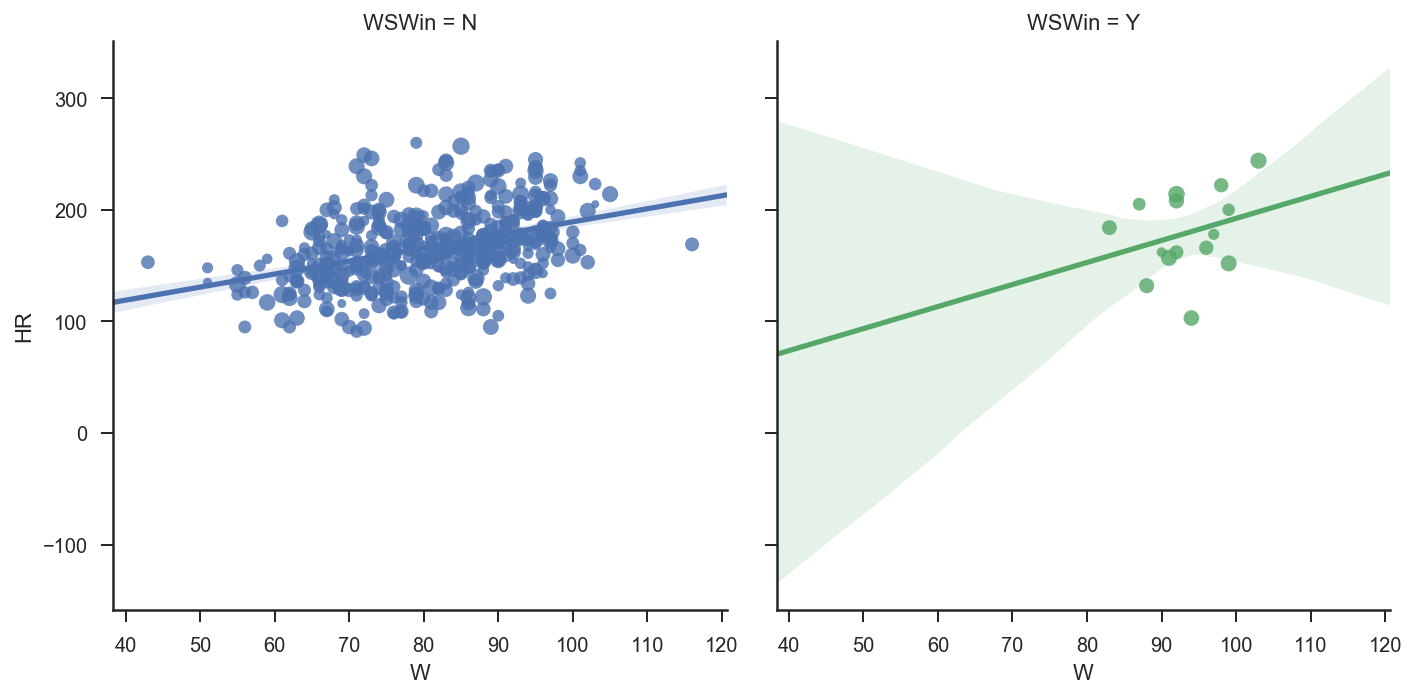

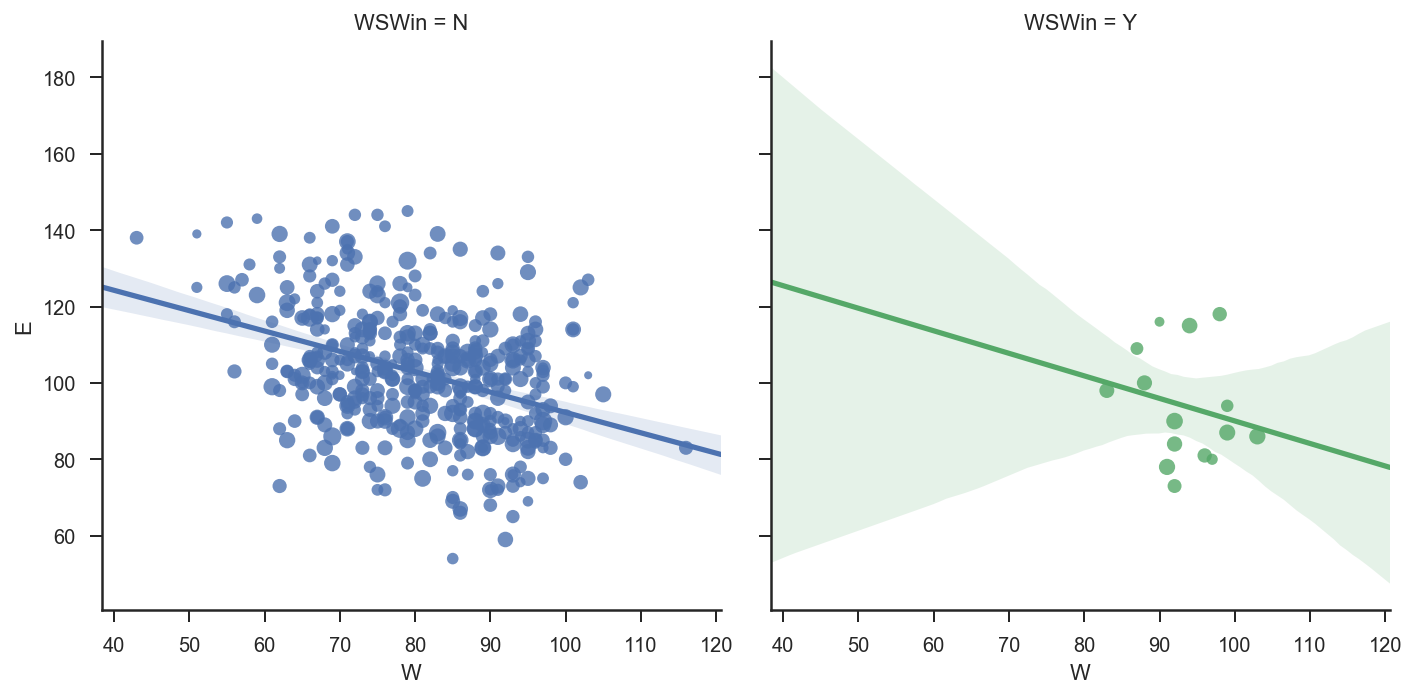

In [27]:
# teams = pd.read_csv(os.path.join(ROOT, 'Teams.csv')).dropna()
teams = model.teams
sns.set(style='ticks')
g = sns.lmplot(x="W", y="HR", col="WSWin", data=teams,
              markers='o', hue='WSWin',
              scatter_kws=dict(s=teams.attendance * 0.00002))
plt.show()
g = sns.lmplot(x="W", y="E", col="WSWin", data=teams,
              markers='o',  hue='WSWin',
              scatter_kws=dict(s=teams.attendance * 0.00002))
plt.show()

The above four plot shows different things. These are grouped between `World Series Winners` and `Others`. Scatter plots with world series winners are in Blue while others are in Green. This shows the correlation of `Team's Winning (W)` with two important metrics, i.e., `Total Homeruns Scored(HR)` and `Numbers of errors made(E)`. The scatter plot marker sizes are also controlled by down sclaed value of `Attendance`.

As we can see that the most of the teams showed a upward trend while correlating with Total homeruns scored while they showed a downward treand correlating with Errors made. This pattern was quite expected. We also see that bigger balls are scattered all over which means that there is hardly any relation of the attendance with the correlation group of Wins and Errors or Wins and Homeruns.

In [28]:
k = teams.groupby('Rank')
data_2 = k['attendance', 'FP', 
           'RA', 'R', 'HRA',
           'CG'].mean()
data_2 = data_2.reset_index()
p = pd.DataFrame(columns=['DivWin', 'WCWin', 
                          'LgWin', 'WSWin'])
for key, grp in k:
    temp = grp[['DivWin', 'WCWin', 'LgWin', 
       'WSWin']].applymap(lambda e: int(e == 'Y')).sum()
    p = p.append(pd.DataFrame(temp.to_dict(), index=[key,]), 
                 ignore_index=True)
pd.concat([data_2, p], axis=1).set_index('Rank')

,attendance,FP,RA,R,HRA,CG,DivWin,LgWin,WCWin,WSWin
Rank,,,,,,,,,,
1,2935598.978,0.984,682.000,793.778,157.000,6.311,90.000,19.000,0.000,10.000
2,2622748.511,0.984,702.500,772.411,158.856,5.622,0.000,11.000,35.000,5.000
3,2415210.211,0.983,731.433,744.656,164.622,5.422,0.000,0.000,1.000,0.000
4,2257799.870,0.983,784.489,717.587,174.761,5.641,0.000,0.000,0.000,0.000
5,2035369.773,0.981,812.720,688.867,178.547,4.080,0.000,0.000,0.000,0.000
6,2011611.462,0.982,828.462,667.077,183.231,4.615,0.000,0.000,0.000,0.000


### <font color='orange'> What ensures first rank ?? </font>

We can see that as it was expected more run team scored, better was their ranks. For example teams with rank `1` scored an average of  `793.778` which is almost `20` runs more than the second ranking teams having `772.441` runs. The same trend is visible for homeruns. Consequently, teams with rank `1`, have less `runs allowed(RA) and homeruns allowed(HRA)` as compared to teams with rank 2 or 3.

Interestingly, `Fielding Percentage(FP)` is almost same for teams with any ranks which means `Fielding Percentage` doesn't affect the rank of any teams. This is logical also because any team would try to field as much as possible irrespective of their expected/desired rank.

The even more interesting part is `Division Wins(DivWin), League Wins(LgWin), Wildcard Wins(WCWin) and World Series Wins(WSWin)`. We can see that `World Series Wins` affect a lot in rank which was logical but `Division Wins` is only constrained to first ranking teams. What does this mean?? This means if any team wins a world series, there is a probable chance that team can be in the list of rank `1` but there is no gurantee because even second ranking players are also world series winners. But if a team gets a `Divisional Win`, there is a gurantee that the team would be in the rank `1` list because divisional wins is only constrained within the first ranking teams. The first ranking teams are never `Wild card winners` which may mean that to become a first ranker, a team has to perform from the beginning and there can't be any abrupt or special case first rankers. **You have to be a clear winner to be first ranker, NO WILDCARD, NO SPECIAL CASES**. 

### <font color='orange'> Final Hypothesis ?? </font>

Now before I end this analysis, lets induge into some hypothesis and a plot again. The Hypothesis test would be based on the Teams statistics. 

**I think the less number of complete game(CG) players the team had, the better their chances were to be in top 3 in rankings**

In baseball the complete game(CG) means when a pitcher pitches a complete game without any rest. I believe that if a pitcher is pitching for the complete game, his efficiency would decrease than those players who are sitting idle. So if a team would have more CG players, their performance would suffer and lesser their chance would be in top 3. I may be wrong but there is no better way to find this out other than a hypothesis test.

Statistically we would first take two data frames; first having entries of all top three teams only and second, having entries for rest of the teams. Then we take two sample series. One would have number of CG players for top ranking teams and other is numner of CG players for rest of the teams. Then we would perform **One tailed Independent t-Test** where,


$$ \text{    H}_o \rightarrow \text{Average number of CG players for both would be same or, } \Leftrightarrow \mu_t = \mu_b $$
$$ \text{    H}_a \rightarrow \text{Top teams would have less CG players than others or, } \Leftrightarrow \mu_t < \mu_b $$


$$ \mu_t \rightarrow \text{Mean of the number of CG players in top teams}$$
$$ \mu_b \rightarrow \text{Mean of the number of CG players in bottom teams}$$

In [29]:
##### Getting two different dataframes #########
top_teams = teams[teams.Rank < 4]
bottom_teams = teams[teams.Rank > 3]

####### Taking samples #######
top_teams_sample = np.array(top_teams.CG)
bottom_teams_sample = np.array(bottom_teams.CG)

###### Degrees of Freedom #######
df = len(top_teams_sample) + len(bottom_teams_sample) - 2
# print(df)

###### α Value ######
alpha = 0.5


####### Mean of Samples ##########
x_top = top_teams_sample.mean()
x_bottom = bottom_teams_sample.mean()

# #######  t-statistics at α=0.5 ######
# #### For degrees of freedom of 448 and one tailed t-test #####
t_alpha = -1.64826197

# ####### Standard Deviations #########
S_top = top_teams_sample.std(ddof=1)
S_bottom = bottom_teams_sample.std(ddof=1)


# ######## Sample Sizes ########
n_top = len(top_teams_sample)
n_bottom = len(bottom_teams_sample)

# ####### Standard Error ########
s1 = (S_top**2) / n_top
s2 = (S_bottom*2) / n_bottom
s = s1 + s2
SE = np.sqrt(s)  # <------ Standard Error

# ###### t-statistics for the sample ######
t_stat = (x_top - x_bottom) / SE

HTML("t-Satistics is <strong>{}</strong> while the \
     t-critical at α=0.5 is <strong>{}</strong>".format(t_stat, t_alpha))

### <font color='orange'> Oops!! I was wrong. </font>

Looks like I was completely wrong. The `t-stats` is a lot more than the one tailed `t-critical` value. This mean we have to accept the NULL Hypothesis. But NULL hypothesis was that their means would be same. But looking at the `t-stats` we see that if our ALTERNATIVE hypothesis would have been $$\mu_h > \mu_l$$ or $$\mu_h \ne \mu_l$$, then `t-critical` value would have been `1.64826197` for one tailed and `±1.96527334` for two tailed, whould have forced us to accept ALTERNATIVE Hypothesis. Looking at all these, we have to say the teams having more CS, tends to be in top 3. The possible explanation that I can think of is that if more players was playing without taking any break, they would probably understand the field, opponent and the pitching tactics which led to their better performance. 

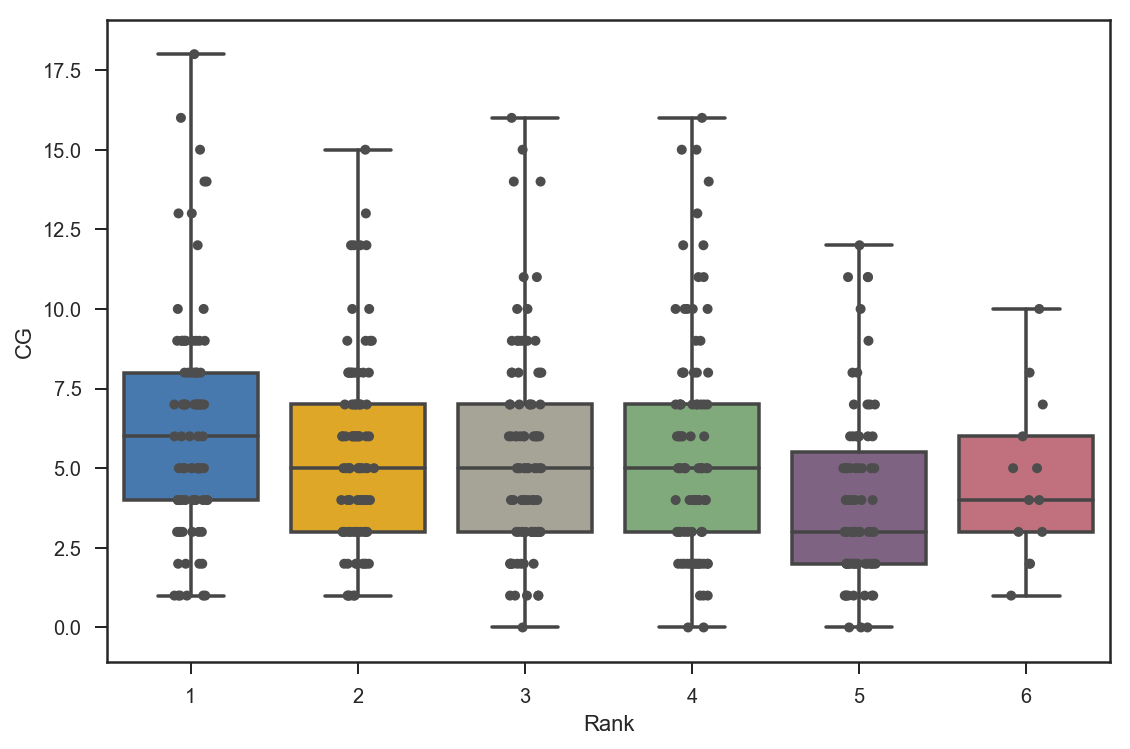

In [30]:
colors = ["windows blue", "amber", 
          "greyish", "faded green", 
          "dusty purple", 'rose']
ax = sns.boxplot(x="Rank", y="CG", data=teams, 
                 whis=np.inf, 
                 palette=sns.xkcd_palette(colors))
ax = sns.stripplot(x="Rank", y="CG", data=teams,
               jitter=True, color=".3")
plt.show()

The above bar-chart shows what we have found using the Hypothesis. Rank 1, 2 & 3 holders much widely distributed as compared to other rankers. With in I tentatively end my Analysis here.